In [102]:
import tensorflow as tf
import pandas as pd
import regex as re
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers
import numpy as np

In [3]:
# Load the saved model
loaded_model = tf.keras.models.load_model("/Users/jurajsimkovic/Desktop/WU/Bachelorarbeit/model")

In [4]:
# import tweets from Clinton and Trump
df = pd.read_csv('/Users/jurajsimkovic/Desktop/WU/Bachelorarbeit/data/tweets_clinton_trump.csv')

In [6]:
df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [7]:
df.columns

Index(['id', 'handle', 'text', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'],
      dtype='object')

In [8]:
text_handle = df.drop(['id', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'],axis=1)

In [10]:
text_handle.tail()

,handle,text
6439,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Faceboo..."
6440,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell..."
6441,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @r..."
6442,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack22..."
6443,realDonaldTrump,"""@SalRiccobono: @realDonaldTrump @troyconway D..."


In [11]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
    text = re.sub(r'#','', text) #remove hash
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    text = re.sub('\s+', ' ', text) #remove new line char
    text = re.sub("\'", "", text) #remove single quotes
    
    return text

In [17]:
text_handle["text"] = text_handle["text"].apply(cleantext)

In [19]:
text_handle["text"].head(15)

0     The question in this election: Who can put the...
1     Last night, Donald Trump said not paying taxes...
2     Couldnt be more proud of . Her vision and comm...
3     If we stand together, theres nothing we cant d...
4     Both candidates were asked about how theyd con...
5     Join me for a 3pm rally - tomorrow at the Mid-...
6     This election is too important to sit out. Go ...
7       When Donald Trump goes low...register to vote: 
8     Once again, we will have a government of, by a...
9     3) Has Trump offered a single proposal to redu...
10    The election is just weeks away. Check if your...
11    On National VoterRegistrationDay, make sure yo...
12    Hillary Clintons Campaign Continues To Make Fa...
13    CNBC, Time magazine online polls say Donald Tr...
14    Donald Trump lied to the American people at le...
Name: text, dtype: object

In [ ]:
import string
text_handle["text"] = text_handle["text"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])

In [20]:
text_handle["text"] = text_handle["text"].apply(lambda wrd: ''.join(wrd))

In [23]:
text_handle["text"]

0       The question in this election: Who can put the...
1       Last night, Donald Trump said not paying taxes...
2       Couldnt be more proud of . Her vision and comm...
3       If we stand together, theres nothing we cant d...
4       Both candidates were asked about how theyd con...
                              ...                        
6439    ": My Facebook Groups are all voting TRUMP /40...
6440    ": watched lowell mass speech. Awesome. Great ...
6441    "_lol: Iowa key endorsement for Cant wait for ...
6442    ": Minimizing dependency on China is crucial.O...
6443    ": Donald get big business back and MAKE AMERI...
Name: text, Length: 6444, dtype: object

In [24]:
from nltk.corpus import stopwords

In [25]:
text_handle["text"][:50] = text_handle["text"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))

In [26]:
text_handle["text"]

0       The question election: Who put plans action ma...
1       Last night, Donald Trump said paying taxes "sm...
2       Couldnt proud . Her vision command last nights...
3       If stand together, theres nothing cant do. Mak...
4       Both candidates asked theyd confront racial in...
                              ...                        
6439    ": My Facebook Groups are all voting TRUMP /40...
6440    ": watched lowell mass speech. Awesome. Great ...
6441    "_lol: Iowa key endorsement for Cant wait for ...
6442    ": Minimizing dependency on China is crucial.O...
6443    ": Donald get big business back and MAKE AMERI...
Name: text, Length: 6444, dtype: object

In [27]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),     deacc=True))

In [28]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [29]:
temp = []
data_to_list = text_handle['text'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(data_to_list[i])
data_wordslem = list(sent_to_words(temp))

Using Lemmatizer instead of stemming. Lemmatizer is preffered over stemming. Lemmatizer find the root word whereas Stemmizer shorten the word. For Example, word 'Caring' -> Lemmatizer -> 'Care' WHEREAS 'Caring' -> Stemming -> 'Car'

In [30]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

In [31]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jurajsimkovic/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
for i in range(len(data_wordslem)):
    for j in range(len(data_wordslem[i])):
        data_wordslem[i][j] = lemmatizer.lemmatize(data_wordslem[i][j],pos="v")

In [33]:
data = []
for i in range(len(data_wordslem)):
    data.append(detokenize(data_wordslem[i]))
print(data[:5])

['the question election who put plan action make life better', 'last night donald trump say pay tax smart you know call it unpatriotic', 'couldnt proud her vision command last nights debate show shes ready next', 'if stand together theres nothing cant do make sure youre ready vote', 'both candidates ask theyd confront racial injustice only one real answer']


In [95]:
# add new cleaned column to dataframe
text_handle["data"] = data
text_handle

,handle,text,data
0,HillaryClinton,The question election: Who put plans action ma...,the question election who put plan action make...
1,HillaryClinton,"Last night, Donald Trump said paying taxes ""sm...",last night donald trump say pay tax smart you ...
2,HillaryClinton,Couldnt proud . Her vision command last nights...,couldnt proud her vision command last nights d...
3,HillaryClinton,"If stand together, theres nothing cant do. Mak...",if stand together theres nothing cant do make ...
4,HillaryClinton,Both candidates asked theyd confront racial in...,both candidates ask theyd confront racial inju...
...,...,...,...
6439,realDonaldTrump,""": My Facebook Groups are all voting TRUMP /40...",my facebook group be all vote trump people great
6440,realDonaldTrump,""": watched lowell mass speech. Awesome. Great ...",watch lowell mass speech awesome great crowd m...
6441,realDonaldTrump,"""_lol: Iowa key endorsement for Cant wait for ...",iowa key endorsement for cant wait for the iow...
6442,realDonaldTrump,""": Minimizing dependency on China is crucial.O...",minimize dependency on china be crucial only t...


In [97]:
text_handle.shape

(6444, 3)

In [48]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

6444


In [42]:
# apply the model
#predictions = loaded_model.predict(tweets)

202/202 [==============================] - 3s 8ms/step


In [50]:
sentiment = ['Neutral','Negative','Positive']

In [66]:
sequence = tokenizer.texts_to_sequences(['I go to gym daily'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(loaded_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 27ms/step


'Neutral'

In [89]:
unique_handles = text_handle["handle"].unique()
unique_handles

array(['HillaryClinton', 'realDonaldTrump'], dtype=object)

In [142]:
def sentiment_analysis(data):
    sentiment_storage = []
    for d in data:
        sequence = tokenizer.texts_to_sequences([d])        
        test = pad_sequences(sequence, maxlen=max_len)
        sentiment_storage.append(sentiment[np.around(loaded_model.predict(test), decimals=0).argmax(axis=1)[0]])
    return sentiment_storage

In [71]:
for d in data[:5]:
    print(d)
    print("-----------------")

the question election who put plan action make life better
-----------------
last night donald trump say pay tax smart you know call it unpatriotic
-----------------
couldnt proud her vision command last nights debate show shes ready next
-----------------
if stand together theres nothing cant do make sure youre ready vote
-----------------
both candidates ask theyd confront racial injustice only one real answer
-----------------


In [146]:
predicted_sentiment = sentiment_analysis(data[:5])

1/1 [==============================] - 0s 22ms/step


In [147]:
predicted_sentiment

['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative']

In [153]:
# This took a very long time (45min - 1hr). It predicted the sentiment of each
# of the approximately 6600 Twitter posts.

#predicted_sentiment = sentiment_analysis(data)

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


In [154]:
text_handle["predicted_sentiment"] = predicted_sentiment

In [159]:
text_handle

,handle,text,data,predicted_sentiment
0,HillaryClinton,The question election: Who put plans action ma...,the question election who put plan action make...,Neutral
1,HillaryClinton,"Last night, Donald Trump said paying taxes ""sm...",last night donald trump say pay tax smart you ...,Neutral
2,HillaryClinton,Couldnt proud . Her vision command last nights...,couldnt proud her vision command last nights d...,Neutral
3,HillaryClinton,"If stand together, theres nothing cant do. Mak...",if stand together theres nothing cant do make ...,Neutral
4,HillaryClinton,Both candidates asked theyd confront racial in...,both candidates ask theyd confront racial inju...,Negative
...,...,...,...,...
6439,realDonaldTrump,""": My Facebook Groups are all voting TRUMP /40...",my facebook group be all vote trump people great,Positive
6440,realDonaldTrump,""": watched lowell mass speech. Awesome. Great ...",watch lowell mass speech awesome great crowd m...,Neutral
6441,realDonaldTrump,"""_lol: Iowa key endorsement for Cant wait for ...",iowa key endorsement for cant wait for the iow...,Neutral
6442,realDonaldTrump,""": Minimizing dependency on China is crucial.O...",minimize dependency on china be crucial only t...,Positive


# Visualize the results

In [170]:
hillary_positive_sentiment = text_handle[(text_handle['handle'] == 'HillaryClinton') & (text_handle['predicted_sentiment'] == 'Positive')]
hillary_positive_sentiment

,handle,text,data,predicted_sentiment
32,HillaryClinton,“Donald criticized preparing debate. And know ...,donald criticize prepare debate and know else ...,Positive
38,HillaryClinton,"""She gained massive amount weight...it real pr...",she gain massive amount weight it real problem...,Positive
51,HillaryClinton,"Trump on Alicia, 1996: ""Miss Piggy."" This morn...",trump on alicia miss piggy this morning she ga...,Positive
67,HillaryClinton,43 days left. Let’s go win this thing: DebateN...,days leave let go win this thing debatenight,Positive
74,HillaryClinton,Hillary Clinton did what she needed to do:,hillary clinton do what she need to do,Positive
...,...,...,...,...
4785,HillaryClinton,Trump saying awful things about women isnt the...,trump say awful things about women isnt the mo...,Positive
4801,HillaryClinton,. Reflects On s Passing w/ Prince HillaryClinton,reflect on pass prince hillaryclinton,Positive
4816,HillaryClinton,"Thank you, New York. Lets go win this nominati...",thank you new york let go win this nomination,Positive
4839,HillaryClinton,"It’s about lifting each other up, not tearing ...",it about lift each other up not tear each othe...,Positive


In [175]:
# group by each candidate and each sentiment
hillary_negative_sentiment = text_handle[(text_handle['handle'] == 'HillaryClinton') & (text_handle['predicted_sentiment'] == 'Negative')]
hillary_neutral_sentiment = text_handle[(text_handle['handle'] == 'HillaryClinton') & (text_handle['predicted_sentiment'] == 'Neutral')]
trump_negative_sentiment = text_handle[(text_handle['handle'] == 'realDonaldTrump') & (text_handle['predicted_sentiment'] == 'Negative')]
trump_positive_sentiment = text_handle[(text_handle['handle'] == 'realDonaldTrump') & (text_handle['predicted_sentiment'] == 'Positive')]
trump_neutral_sentiment = text_handle[(text_handle['handle'] == 'realDonaldTrump') & (text_handle['predicted_sentiment'] == 'Neutral')]

Text(0.5, 1.0, 'Polarity of posts of each candidate')

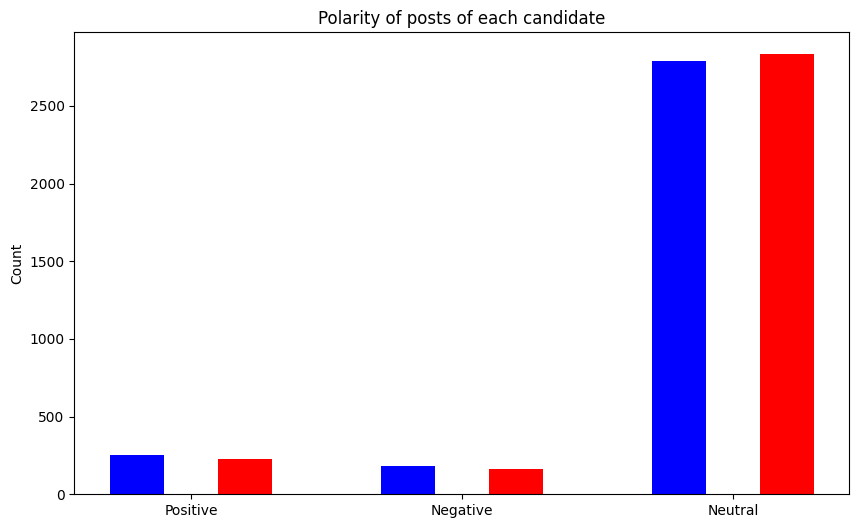

In [178]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for Hillary Clinton
bar_width = 0.2
bar_positions_hillary = range(1, 4)
ax.bar([p - bar_width for p in bar_positions_hillary], [len(hillary_positive_sentiment), len(hillary_negative_sentiment), len(hillary_neutral_sentiment)], width=bar_width, label='Hillary Clinton', color='blue')

# Plotting bars for Donald Trump
bar_positions_trump = range(1, 4)
ax.bar([p + bar_width for p in bar_positions_trump], [len(trump_positive_sentiment), len(trump_negative_sentiment), len(trump_neutral_sentiment)], width=bar_width, label='Donald Trump', color='red')

# Set labels and title
ax.set_xticks([p for p in bar_positions_hillary])
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])
ax.set_ylabel('Count')
ax.set_title('Polarity of posts of each candidate')